In [39]:
##importing
import pandas as pd
# Web scraping, pickle imports
import requests
from bs4 import BeautifulSoup
import pickle

In [40]:
# Scrapes transcript data from scrapsfromtheloft.com
def url_to_transcript(url):
    '''Returns transcript data specifically from scrapsfromtheloft.com.'''
    page = requests.get(url).text
    soup = BeautifulSoup(page, "lxml")
    text = [p.text for p in soup.find(class_="post-content").find_all('p')]
    print(url)
    return text

In [41]:
# URLs of transcripts in scope
urls = ['https://scrapsfromtheloft.com/2020/02/07/pretty-poison-review-pauline-kael/',
        'https://scrapsfromtheloft.com/2017/06/30/planet-apes-1968-review-pauline-kael/',
        'https://scrapsfromtheloft.com/2018/02/17/back-to-the-future-pauline-kael/',
        'https://scrapsfromtheloft.com/2018/01/12/quest-for-fire-pauline-kael/']

In [42]:
# movies names
movie= ['pretty', 'plant', 'backto', 'quest']

In [43]:
# # Actually request transcripts (takes a few minutes to run)
transcripts = [url_to_transcript(u) for u in urls]

https://scrapsfromtheloft.com/2020/02/07/pretty-poison-review-pauline-kael/
https://scrapsfromtheloft.com/2017/06/30/planet-apes-1968-review-pauline-kael/
https://scrapsfromtheloft.com/2018/02/17/back-to-the-future-pauline-kael/
https://scrapsfromtheloft.com/2018/01/12/quest-for-fire-pauline-kael/


In [44]:
# # Pickle files for later use
# # Make a new directory to hold the text files
#!mkdir transcripts


In [45]:
for i, c in enumerate(movie):
    with open("transcripts/" + c + ".txt", "wb") as file:
        pickle.dump(transcripts[i], file)

In [46]:
# Load pickled files
data = {}
for i, c in enumerate(movie):
    with open("transcripts/" + c + ".txt", "rb") as file:
        data[c] = pickle.load(file)

In [47]:
# Double check to make sure data has been loaded properly
data.keys()

dict_keys(['pretty', 'plant', 'backto', 'quest'])

In [48]:
# More checks
data['pretty'][:2]

['by Pauline Kael',
 'When I discovered that Pretty Poison had opened without advance publicity or screenings, I rushed to see it, because a movie that makes the movie companies so nervous they’re afraid to show it to the critics stands an awfully good chance of being an interesting movie. Mediocrity and stupidity certainly don’t scare them; talent does. This is a remarkable first feature film by a gifted young American, Noel Black — a movie that should have opened in an art house — and it was playing in a vast and empty theatre, from which, no doubt, it will depart upon the week. And the losses will be so heavy that the movie companies will use this picture as another argument against backing young American directors. The television ads for Pretty Poison are a pitiful attempt to make it seem strident and coarse and brutal — to attract teen-agers by passing it off as a cross between Psycho and Bonnie and Clyde. Those attracted this way are likely to hate the film. Pretty Poison simply 

In [49]:
# Let's take a look at our data again
next(iter(data.keys()))

'pretty'

In [50]:
# We are going to change this to key: CINEMAs, value: string format
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(list_of_text)
    return combined_text

In [51]:
# Combine it!
data_combined = {key: [combine_text(value)] for (key, value) in data.items()}

In [52]:
# We can either keep it in dictionary format or put it into a pandas dataframe
pd.set_option('max_colwidth',150)

data_df = pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns = ['transcript']
data_df = data_df.sort_index()
data_df

,transcript
backto,"by Pauline Kael Back to the Future is a piece of Pop Art Americana, featuring Christopher Lloyd as a small-town crackpot inventor who putters in h..."
plant,"by Pauline Kael Planet of the Apes is a very entertaining movie, and you’d better go see it quickly, before your friends take the edge off it by t..."
pretty,"by Pauline Kael When I discovered that Pretty Poison had opened without advance publicity or screenings, I rushed to see it, because a movie that ..."
quest,"by Pauline Kael Eighty thousand years ago, on broad primeval plains, Naoh (Everett McGill), the bravest warrior of the spear-carrying Ulam tribe, ..."


In [53]:
# Apply a first round of text cleaning techniques
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [54]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_df.transcript.apply(round1))
data_clean

,transcript
backto,by pauline kael back to the future is a piece of pop art americana featuring christopher lloyd as a smalltown crackpot inventor who putters in his...
plant,by pauline kael planet of the apes is a very entertaining movie and you’d better go see it quickly before your friends take the edge off it by tel...
pretty,by pauline kael when i discovered that pretty poison had opened without advance publicity or screenings i rushed to see it because a movie that ma...
quest,by pauline kael eighty thousand years ago on broad primeval plains naoh everett mcgill the bravest warrior of the spearcarrying ulam tribe and two...


In [55]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

round2 = lambda x: clean_text_round2(x)

In [56]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_clean.transcript.apply(round2))
data_clean

,transcript
backto,by pauline kael back to the future is a piece of pop art americana featuring christopher lloyd as a smalltown crackpot inventor who putters in his...
plant,by pauline kael planet of the apes is a very entertaining movie and youd better go see it quickly before your friends take the edge off it by tell...
pretty,by pauline kael when i discovered that pretty poison had opened without advance publicity or screenings i rushed to see it because a movie that ma...
quest,by pauline kael eighty thousand years ago on broad primeval plains naoh everett mcgill the bravest warrior of the spearcarrying ulam tribe and two...


In [57]:
movie_names = ['BACK TO THE FUTURE', 'PLANET OF THE APES', 'Pretty Poison', 'QUEST FOR FIRE']

data_df['movie_names'] = movie_names
data_df

,transcript,movie_names
backto,"by Pauline Kael Back to the Future is a piece of Pop Art Americana, featuring Christopher Lloyd as a small-town crackpot inventor who putters in h...",BACK TO THE FUTURE
plant,"by Pauline Kael Planet of the Apes is a very entertaining movie, and you’d better go see it quickly, before your friends take the edge off it by t...",PLANET OF THE APES
pretty,"by Pauline Kael When I discovered that Pretty Poison had opened without advance publicity or screenings, I rushed to see it, because a movie that ...",Pretty Poison
quest,"by Pauline Kael Eighty thousand years ago, on broad primeval plains, Naoh (Everett McGill), the bravest warrior of the spear-carrying Ulam tribe, ...",QUEST FOR FIRE


In [58]:
# Let's pickle it for later use
data_df.to_pickle("corpus.pkl")

In [59]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_clean.transcript)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
data_dtm

,abilities,ability,absurdly,accepting,access,accounts,acting,action,actors,actress,...,yorker,youd,young,youre,youth,youthmarket,yuppie,zemeckis,zing,zinnemann
backto,0,0,0,0,1,0,1,0,1,0,...,1,0,2,1,1,1,1,6,0,0
plant,0,0,1,0,0,0,1,2,1,0,...,1,1,0,2,0,0,0,0,0,0
pretty,1,1,0,0,0,0,2,0,1,1,...,1,0,4,1,0,0,0,0,1,1
quest,0,0,0,1,0,1,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0


In [60]:
# Let's pickle it for later use
data_dtm.to_pickle("dtm.pkl")

In [61]:
# Let's also pickle the cleaned data (before we put it in document-term matrix format) and the CountVectorizer object
data_clean.to_pickle('data_clean.pkl')
pickle.dump(cv, open("cv.pkl", "wb"))

In [62]:
# Read in the document-term matrix
data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

,backto,plant,pretty,quest
abilities,0,0,1,0
ability,0,0,1,0
absurdly,0,1,0,0
accepting,0,0,0,1
access,1,0,0,0


In [63]:
# Find the top 30 words said by each movie
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'backto': [('hes', 12),
  ('like', 8),
  ('marty', 7),
  ('zemeckis', 6),
  ('george', 6),
  ('future', 5),
  ('movie', 5),
  ('gale', 4),
  ('doesnt', 4),
  ('lorraine', 4),
  ('martys', 4),
  ('mcfly', 4),
  ('hill', 3),
  ('thats', 3),
  ('leave', 3),
  ('tv', 3),
  ('valley', 3),
  ('family', 3),
  ('inventor', 3),
  ('comedy', 3),
  ('hero', 3),
  ('set', 3),
  ('parents', 2),
  ('siblings', 2),
  ('machine', 2),
  ('audience', 2),
  ('feel', 2),
  ('crispin', 2),
  ('course', 2),
  ('lloyd', 2)],
 'plant': [('doesnt', 6),
  ('apes', 6),
  ('planet', 4),
  ('movie', 4),
  ('hero', 4),
  ('work', 4),
  ('american', 3),
  ('heston', 3),
  ('hes', 3),
  ('picture', 3),
  ('dont', 3),
  ('sciencefiction', 3),
  ('little', 3),
  ('best', 3),
  ('feels', 2),
  ('old', 2),
  ('just', 2),
  ('conceived', 2),
  ('better', 2),
  ('terms', 2),
  ('closely', 2),
  ('novel', 2),
  ('joke', 2),
  ('really', 2),
  ('new', 2),
  ('seen', 2),
  ('uses', 2),
  ('beauty', 2),
  ('screen', 2),
  ('a

In [64]:
# Print the top 15 words said by each movie
for movie, top_words in top_dict.items():
    print(movie)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

backto
hes, like, marty, zemeckis, george, future, movie, gale, doesnt, lorraine, martys, mcfly, hill, thats
---
plant
doesnt, apes, planet, movie, hero, work, american, heston, hes, picture, dont, sciencefiction, little, best
---
pretty
movie, american, way, pretty, poison, perkins, audience, work, doesnt, movies, best, picture, film, young
---
quest
like, ulam, naoh, way, ika, amoukar, gaw, look, cannibals, makeup, make, dawn, ape, annaud
---


In [65]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each movie
words = []
for movie in data.columns:
    top = [word for (word, count) in top_dict[movie]]
    for t in top:
        words.append(t)
        
words

['hes',
 'like',
 'marty',
 'zemeckis',
 'george',
 'future',
 'movie',
 'gale',
 'doesnt',
 'lorraine',
 'martys',
 'mcfly',
 'hill',
 'thats',
 'leave',
 'tv',
 'valley',
 'family',
 'inventor',
 'comedy',
 'hero',
 'set',
 'parents',
 'siblings',
 'machine',
 'audience',
 'feel',
 'crispin',
 'course',
 'lloyd',
 'doesnt',
 'apes',
 'planet',
 'movie',
 'hero',
 'work',
 'american',
 'heston',
 'hes',
 'picture',
 'dont',
 'sciencefiction',
 'little',
 'best',
 'feels',
 'old',
 'just',
 'conceived',
 'better',
 'terms',
 'closely',
 'novel',
 'joke',
 'really',
 'new',
 'seen',
 'uses',
 'beauty',
 'screen',
 'art',
 'movie',
 'american',
 'way',
 'pretty',
 'poison',
 'perkins',
 'audience',
 'work',
 'doesnt',
 'movies',
 'best',
 'picture',
 'film',
 'young',
 'good',
 'shes',
 'opened',
 'weld',
 'use',
 'shot',
 'new',
 'maybe',
 'tuesday',
 'know',
 'given',
 'kind',
 'television',
 'isnt',
 'style',
 'people',
 'like',
 'ulam',
 'naoh',
 'way',
 'ika',
 'amoukar',
 'gaw',
 '

In [66]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('movie', 3),
 ('doesnt', 3),
 ('picture', 3),
 ('hes', 2),
 ('like', 2),
 ('hero', 2),
 ('audience', 2),
 ('work', 2),
 ('american', 2),
 ('best', 2),
 ('new', 2),
 ('way', 2),
 ('pretty', 2),
 ('marty', 1),
 ('zemeckis', 1),
 ('george', 1),
 ('future', 1),
 ('gale', 1),
 ('lorraine', 1),
 ('martys', 1),
 ('mcfly', 1),
 ('hill', 1),
 ('thats', 1),
 ('leave', 1),
 ('tv', 1),
 ('valley', 1),
 ('family', 1),
 ('inventor', 1),
 ('comedy', 1),
 ('set', 1),
 ('parents', 1),
 ('siblings', 1),
 ('machine', 1),
 ('feel', 1),
 ('crispin', 1),
 ('course', 1),
 ('lloyd', 1),
 ('apes', 1),
 ('planet', 1),
 ('heston', 1),
 ('dont', 1),
 ('sciencefiction', 1),
 ('little', 1),
 ('feels', 1),
 ('old', 1),
 ('just', 1),
 ('conceived', 1),
 ('better', 1),
 ('terms', 1),
 ('closely', 1),
 ('novel', 1),
 ('joke', 1),
 ('really', 1),
 ('seen', 1),
 ('uses', 1),
 ('beauty', 1),
 ('screen', 1),
 ('art', 1),
 ('poison', 1),
 ('perkins', 1),
 ('movies', 1),
 ('film', 1),
 ('young', 1),
 ('good', 1),
 ('shes',

In [67]:
# If more than half of the movie have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

[]

In [68]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [69]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

In [70]:
#data.columns

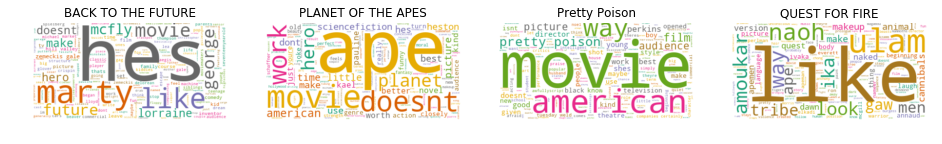

In [72]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 10]

movie_names = ['BACK TO THE FUTURE', 'PLANET OF THE APES', 'Pretty Poison', 'QUEST FOR FIRE']
#full_names = ['Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Bo Burnham', 'Dave Chappelle', 'Hasan Minhaj',
 #             'Jim Jefferies', 'Joe Rogan', 'John Mulaney', 'Louis C.K.', 'Mike Birbiglia', 'Ricky Gervais']

# Create subplots for each movie
for index, movie in enumerate(data.columns):
    wc.generate(data_clean.transcript[movie])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(movie_names[index])
    
plt.show()